In [1]:
import pickle
import random
import dadi
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import data_manip, plotting
from data_manip import msprime_two_epoch, msprime_generate_data
from plotting import plot_accuracy_multi
import matplotlib.pyplot as plt

In [7]:
# # msprime demographic and ancestry simulation parameters (unchanged params)
# s1 = 1e4 # ancestral pop size
# ns = 10 # sample size
# ploidy = 2 # diploid
# mut = 1e-8 # mutation rate

In [3]:
# # generate test params (nu, T) similar to dadi
# test_params = []
# while len(test_params) < 100: 
# # generate random nu and T within the same range as training data range
#     nu = random.random() * 4 - 2 # nu in log scale
#     T = random.random() * 1.9 + 0.1
#     if T/10**nu <= 5: # exclude T/nu > 5
#         params = (nu, T)
#         test_params.append(params)

In [ ]:
# # have to make dem_list separately to have the ability to specify a different demographic model later
# dem_list = [msprime_two_epoch(s1, p) for p in test_params]

In [ ]:
# test_params = pickle.load(open('data/msprime/test_params', 'rb'))
# dem_list = pickle.load(open('data/msprime/test_dem', 'rb'))

In [ ]:
# seq_l = 5e7
# recomb = 1e-8
# test_d = msprime_generate_data(test_params, dem_list, ns, ploidy, seq_l, recomb, mut)
# pickle.dump(test_d, open(f'data/msprime/{seq_l:.1e}_{recomb:.1e}', 'wb'), 2)

In [ ]:
# # TO FURTHER CLEAN UP
# # generate msprime simulations
# list_test_dict_recom = []
# list_test_dict_seq = []

# # list of seq_l from low to high variance in SNP counts
# # (large seq_l means more SNPs means less variance)
# recomb = 1e-8 # fix recombination rate
# seq_l_list = [1e8, 5e7, 1e7, 1e6]
# for seq_l in seq_l_list:
#     list_test_dict_seq.append(msprime_generate_data(test_params,
#                                     dem_list, ns, ploidy, seq_l, recomb, mut))


# # list of recombination rate for variance, from low to high variance 
# # (high to low recombination rate)
# seq_l = 5e7 # fix sequence length in base pair
# recomb_list = [1e-8, 5e-8, 1e-9]
# for recomb in recomb_list:
#     list_test_dict_recom.append(msprime_generate_data(test_params,
#                                     dem_list, ns, ploidy, seq_l, recomb, mut))

In [ ]:
# pickle.dump(list_test_dict_seq, open('data/test_data_msprime_seq_l', 'wb'), 2)
#pickle.dump(list_test_dict_recom, open('data/test_data_msprime_recomb', 'wb'), 2)

In [ ]:
# list_test_dict_seq = pickle.load(open('data/test_data_msprime_seq_l', 'rb'))
# list_test_dict_recom = pickle.load(open('data/test_data_msprime_recomb', 'rb'))

In [11]:
seq_l_list = [5e7]
recomb_list = [1e-8, 1e-9, 1e-10, 1e-11]

# seq_l_list = [1e8, 5e7, 1e7, 5e6]
# recomb_list = [1e-8]

list_test_dict = []
for seq_l in seq_l_list:
    for recomb in recomb_list:
        test_d = pickle.load(open(f'data/msprime/{seq_l:.1e}_{recomb:.1e}', 'rb'))
        list_test_dict.append(test_d)

In [6]:
# load list of train rfr
list_rfr = pickle.load(open('data/new_func/list_rfr','rb'))
# load list of trained mlpr with lbfgs solver
list_mlpr_lbfgs = pickle.load(open('data/new_func/list_mlpr_lbfgs','rb'))
# load list of trained mlpr with adam solver
list_mlpr_adam = pickle.load(open('data/new_func/list_mlpr_adam','rb'))

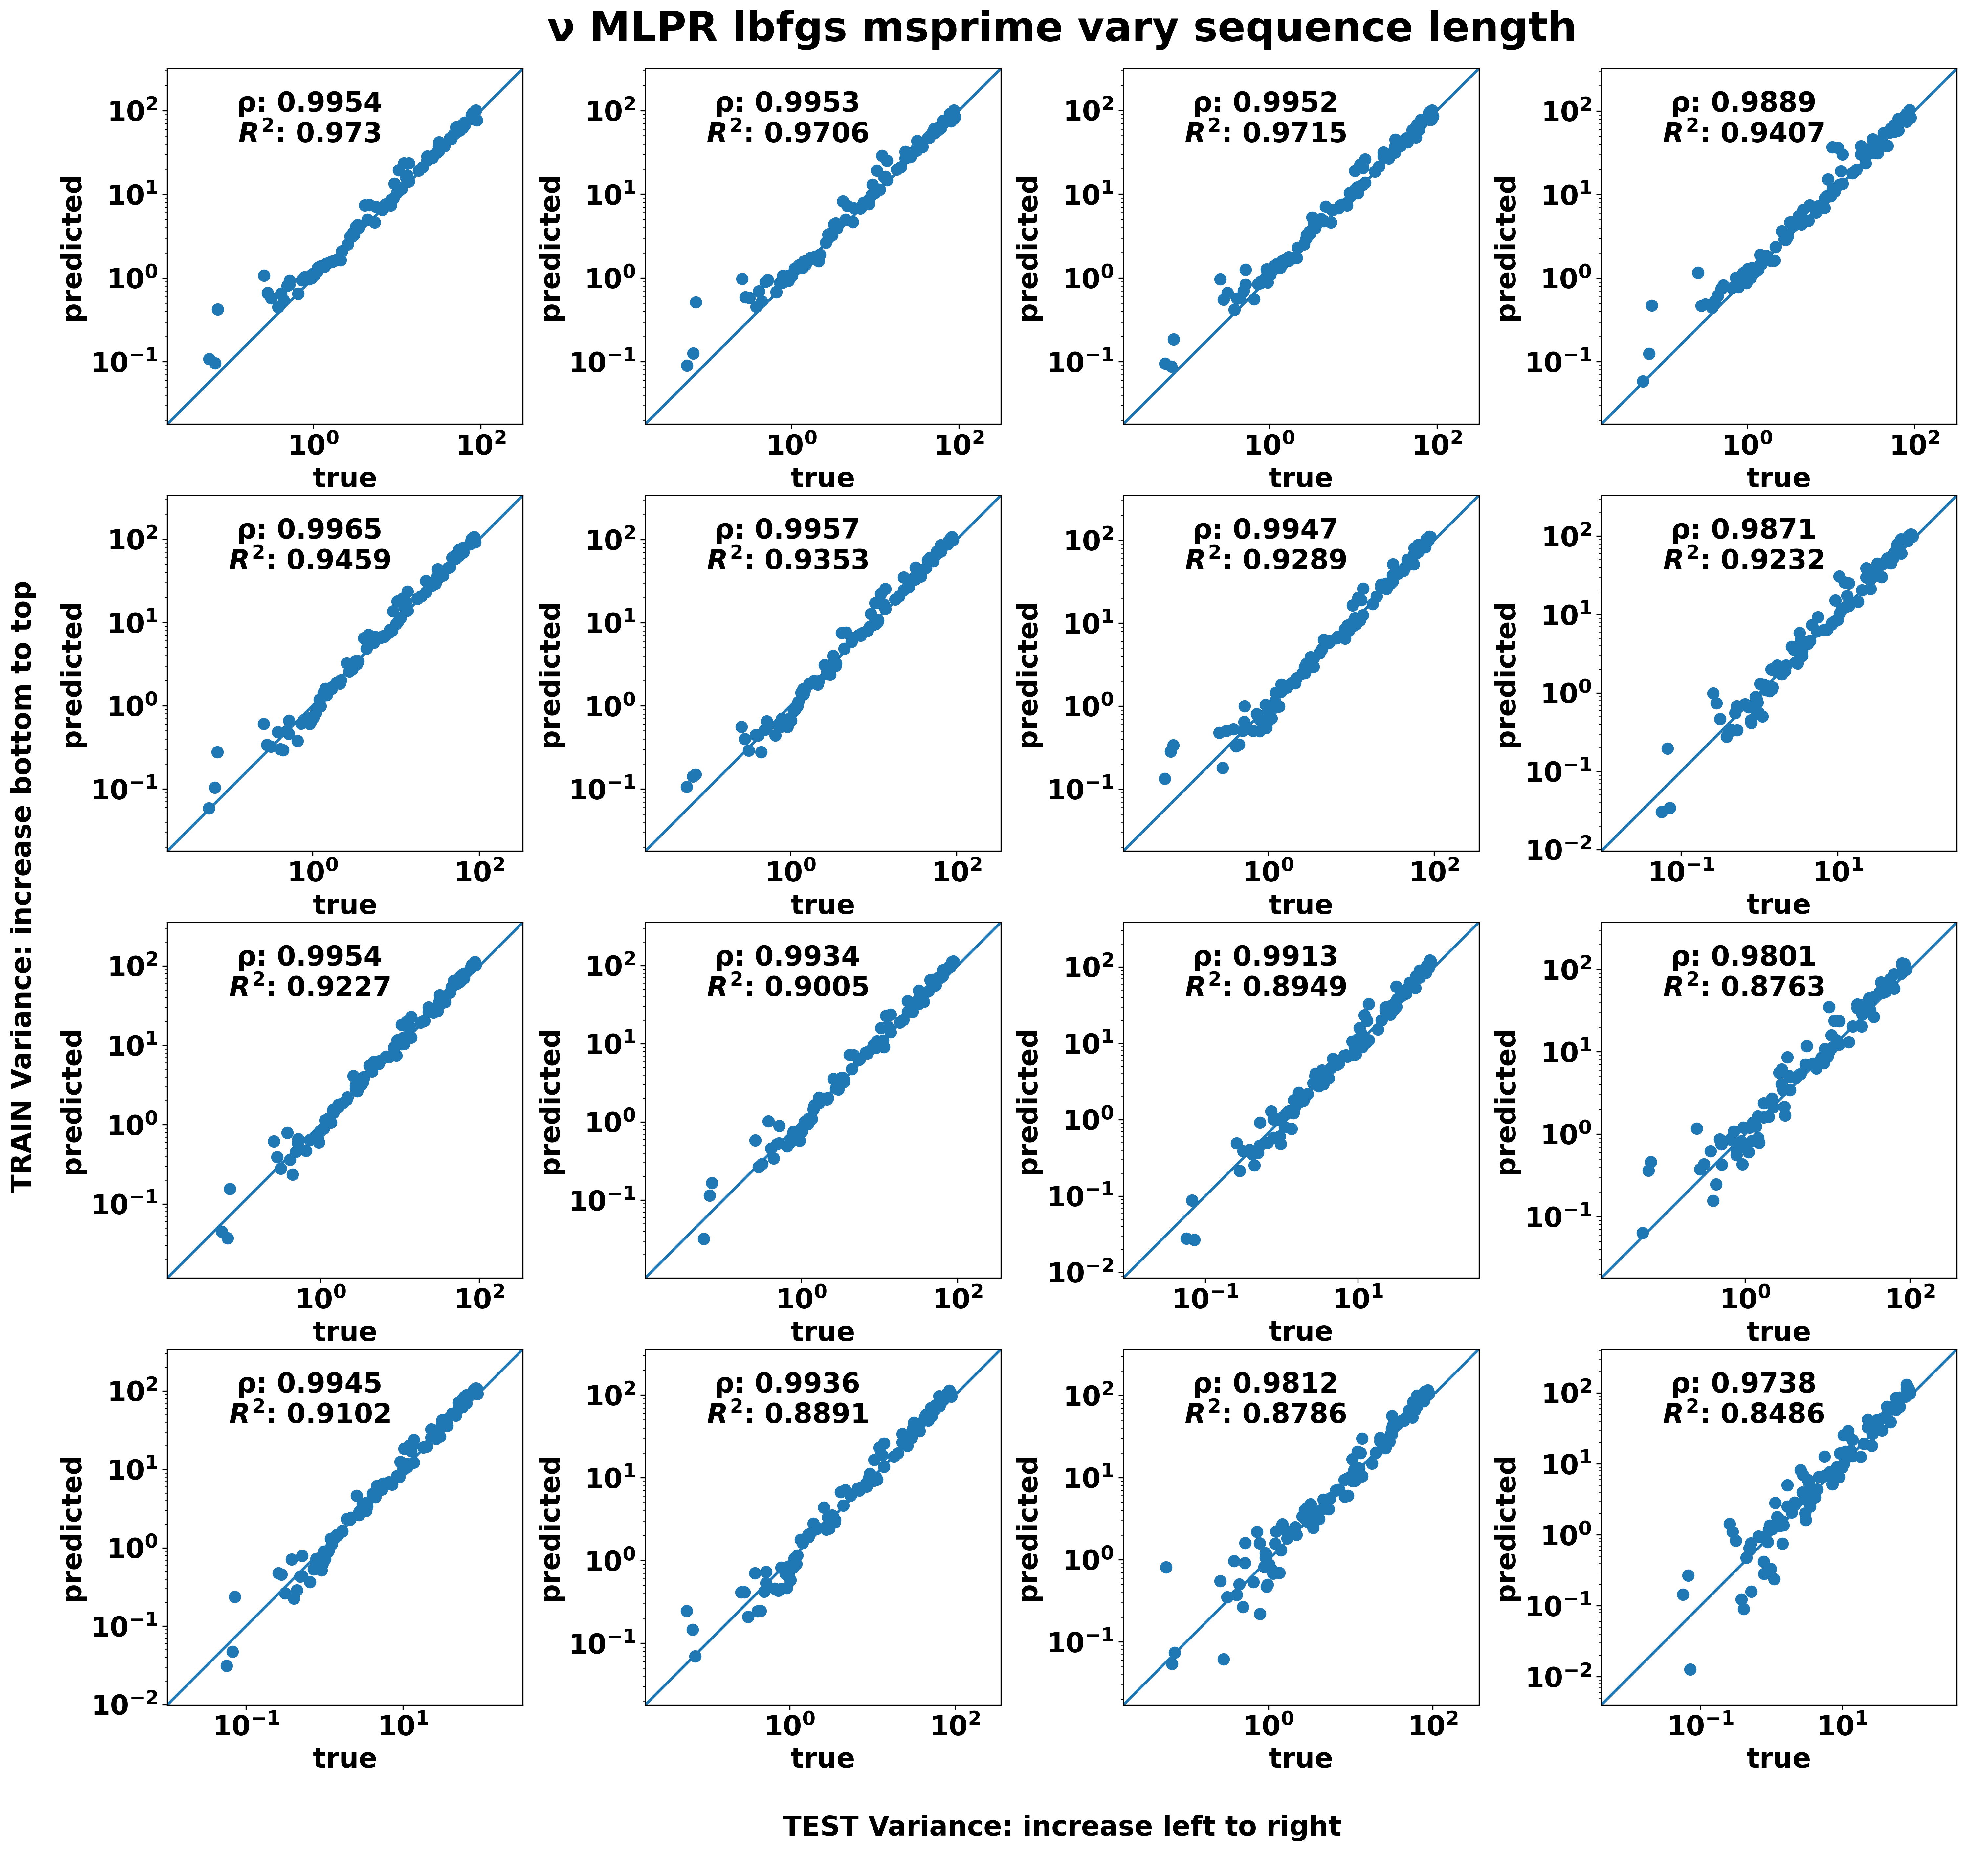

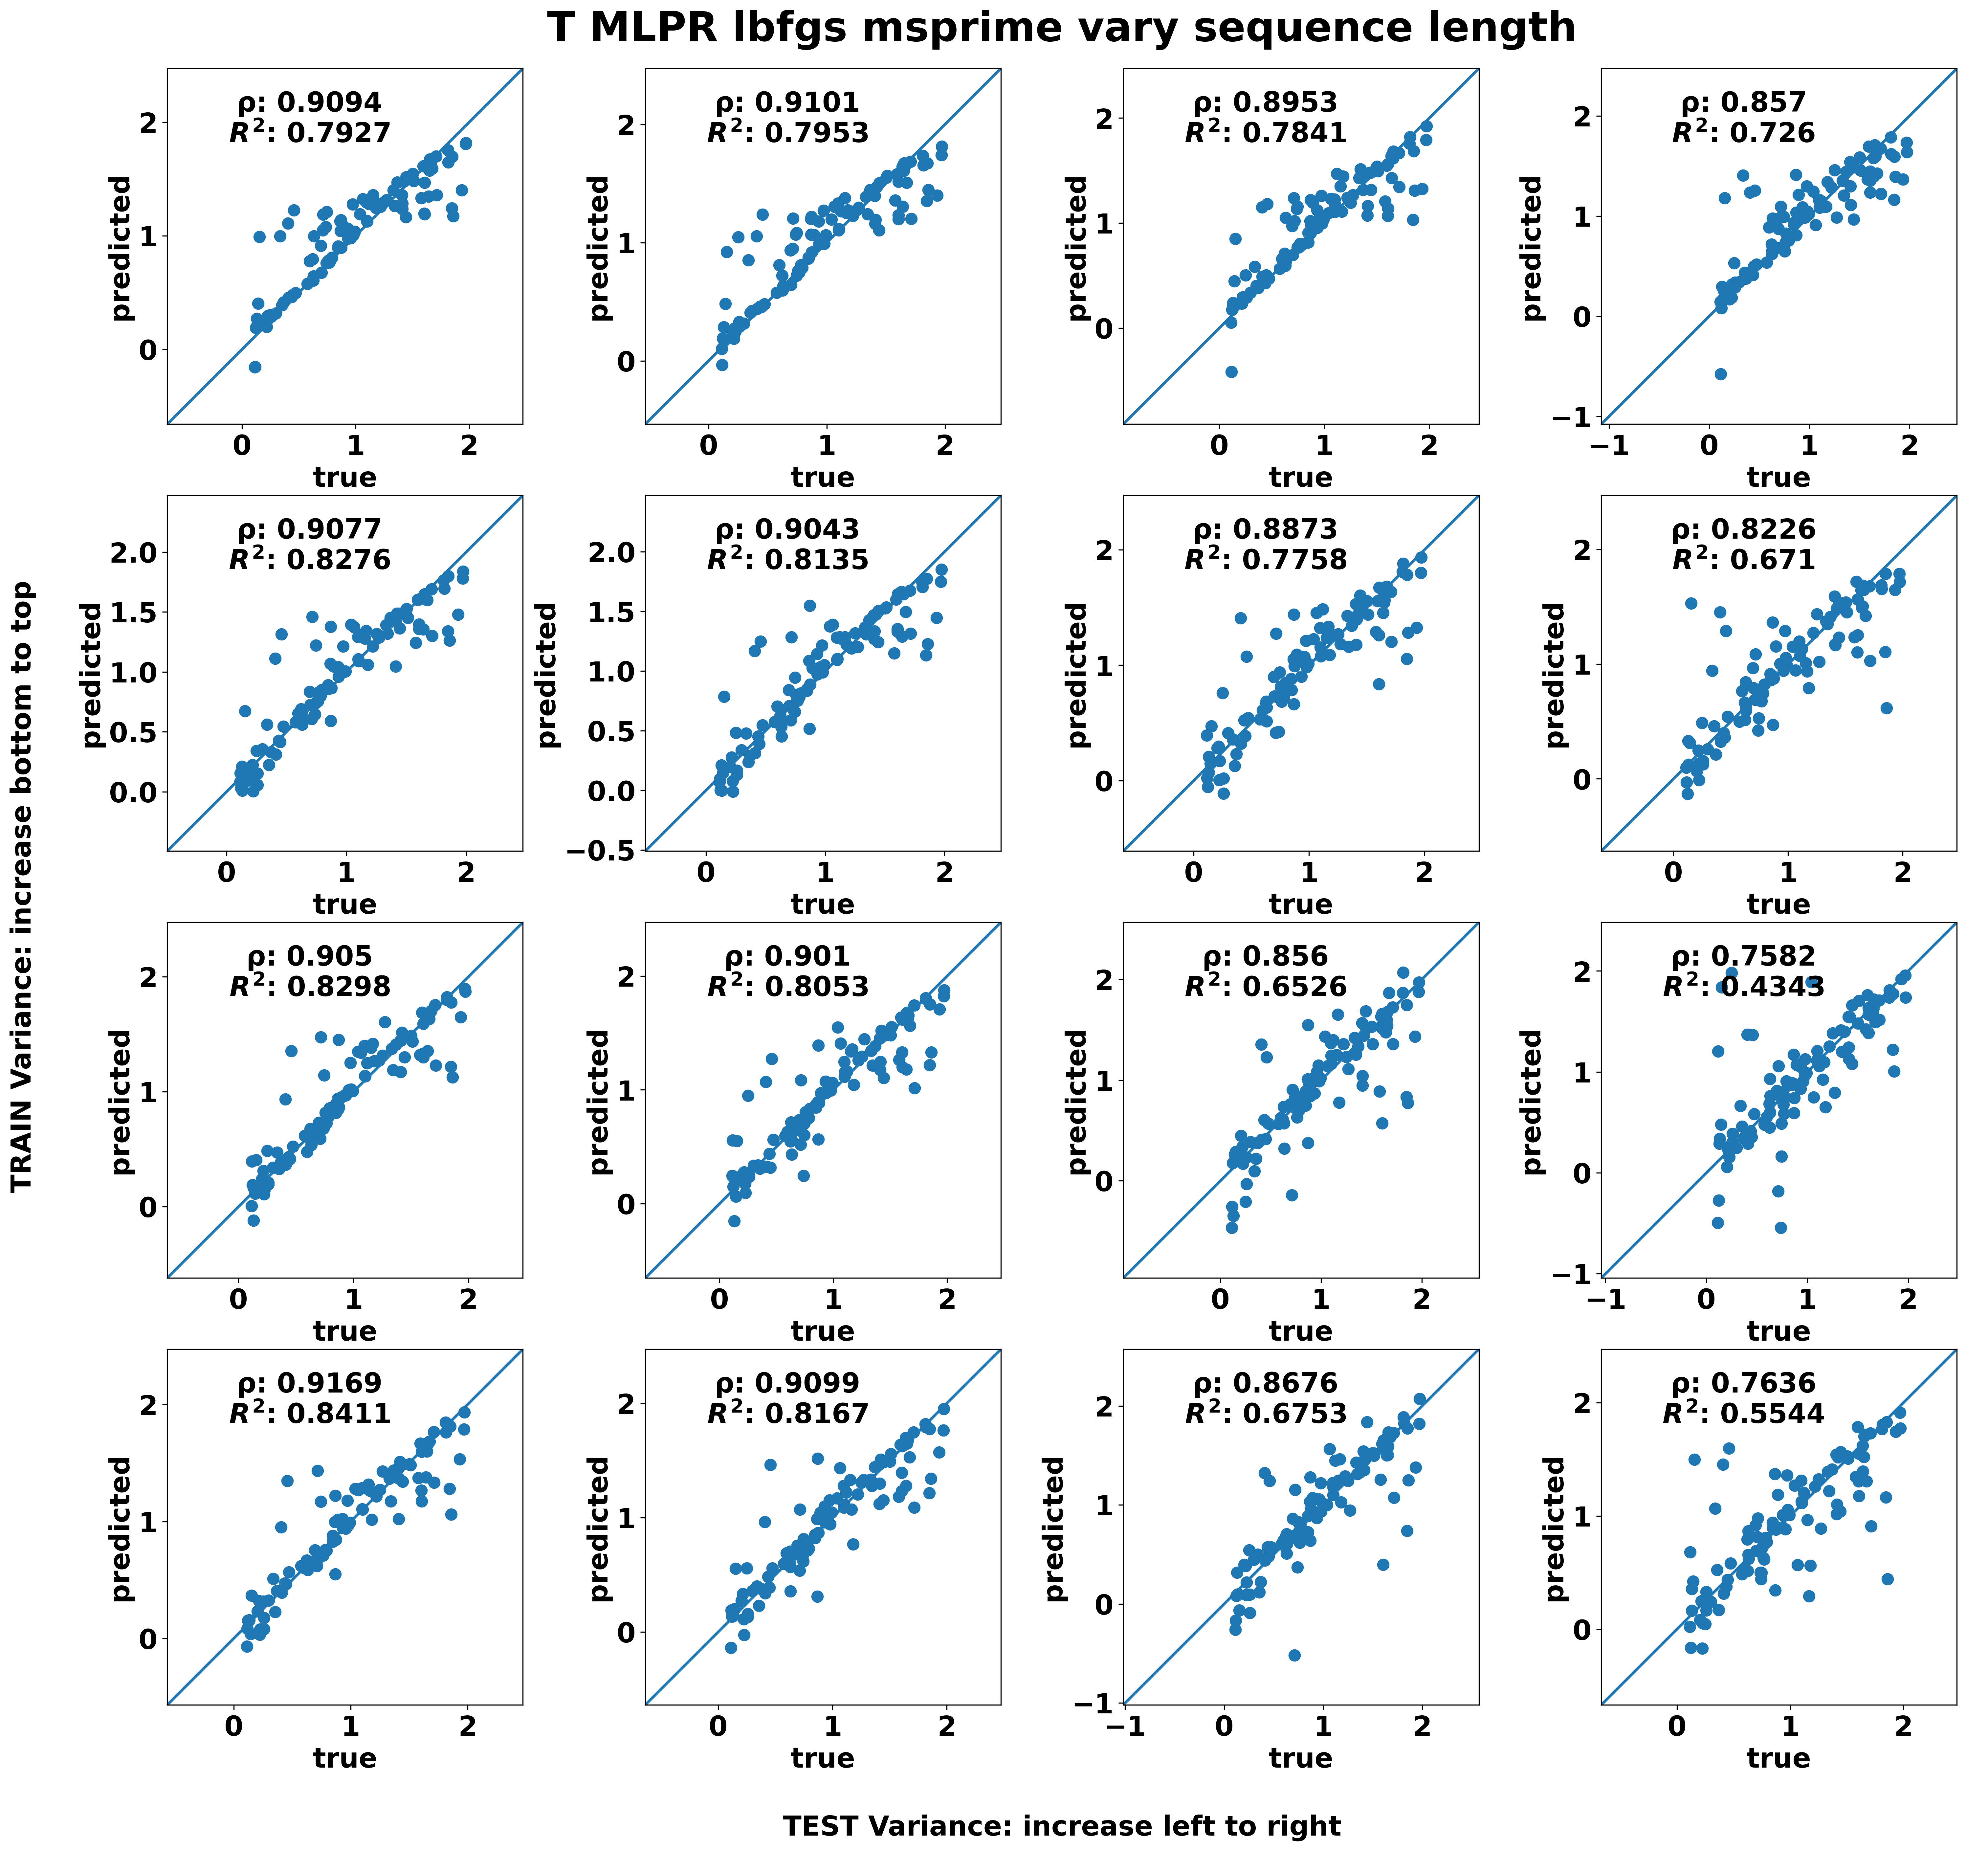

In [7]:
# Plot 4x4 MLPR lbfgs
params = ['ν','T']
model_name = 'MLPR lbfgs msprime vary sequence length'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_mlpr_lbfgs, list_test_dict, 
                        params, model_name, logs, size)
# save fig
for i in range(len(params)):
    plt.figure(i+1).savefig(f'results/msprime/{params[i]}_mlpr_lbfgs_seq.png')

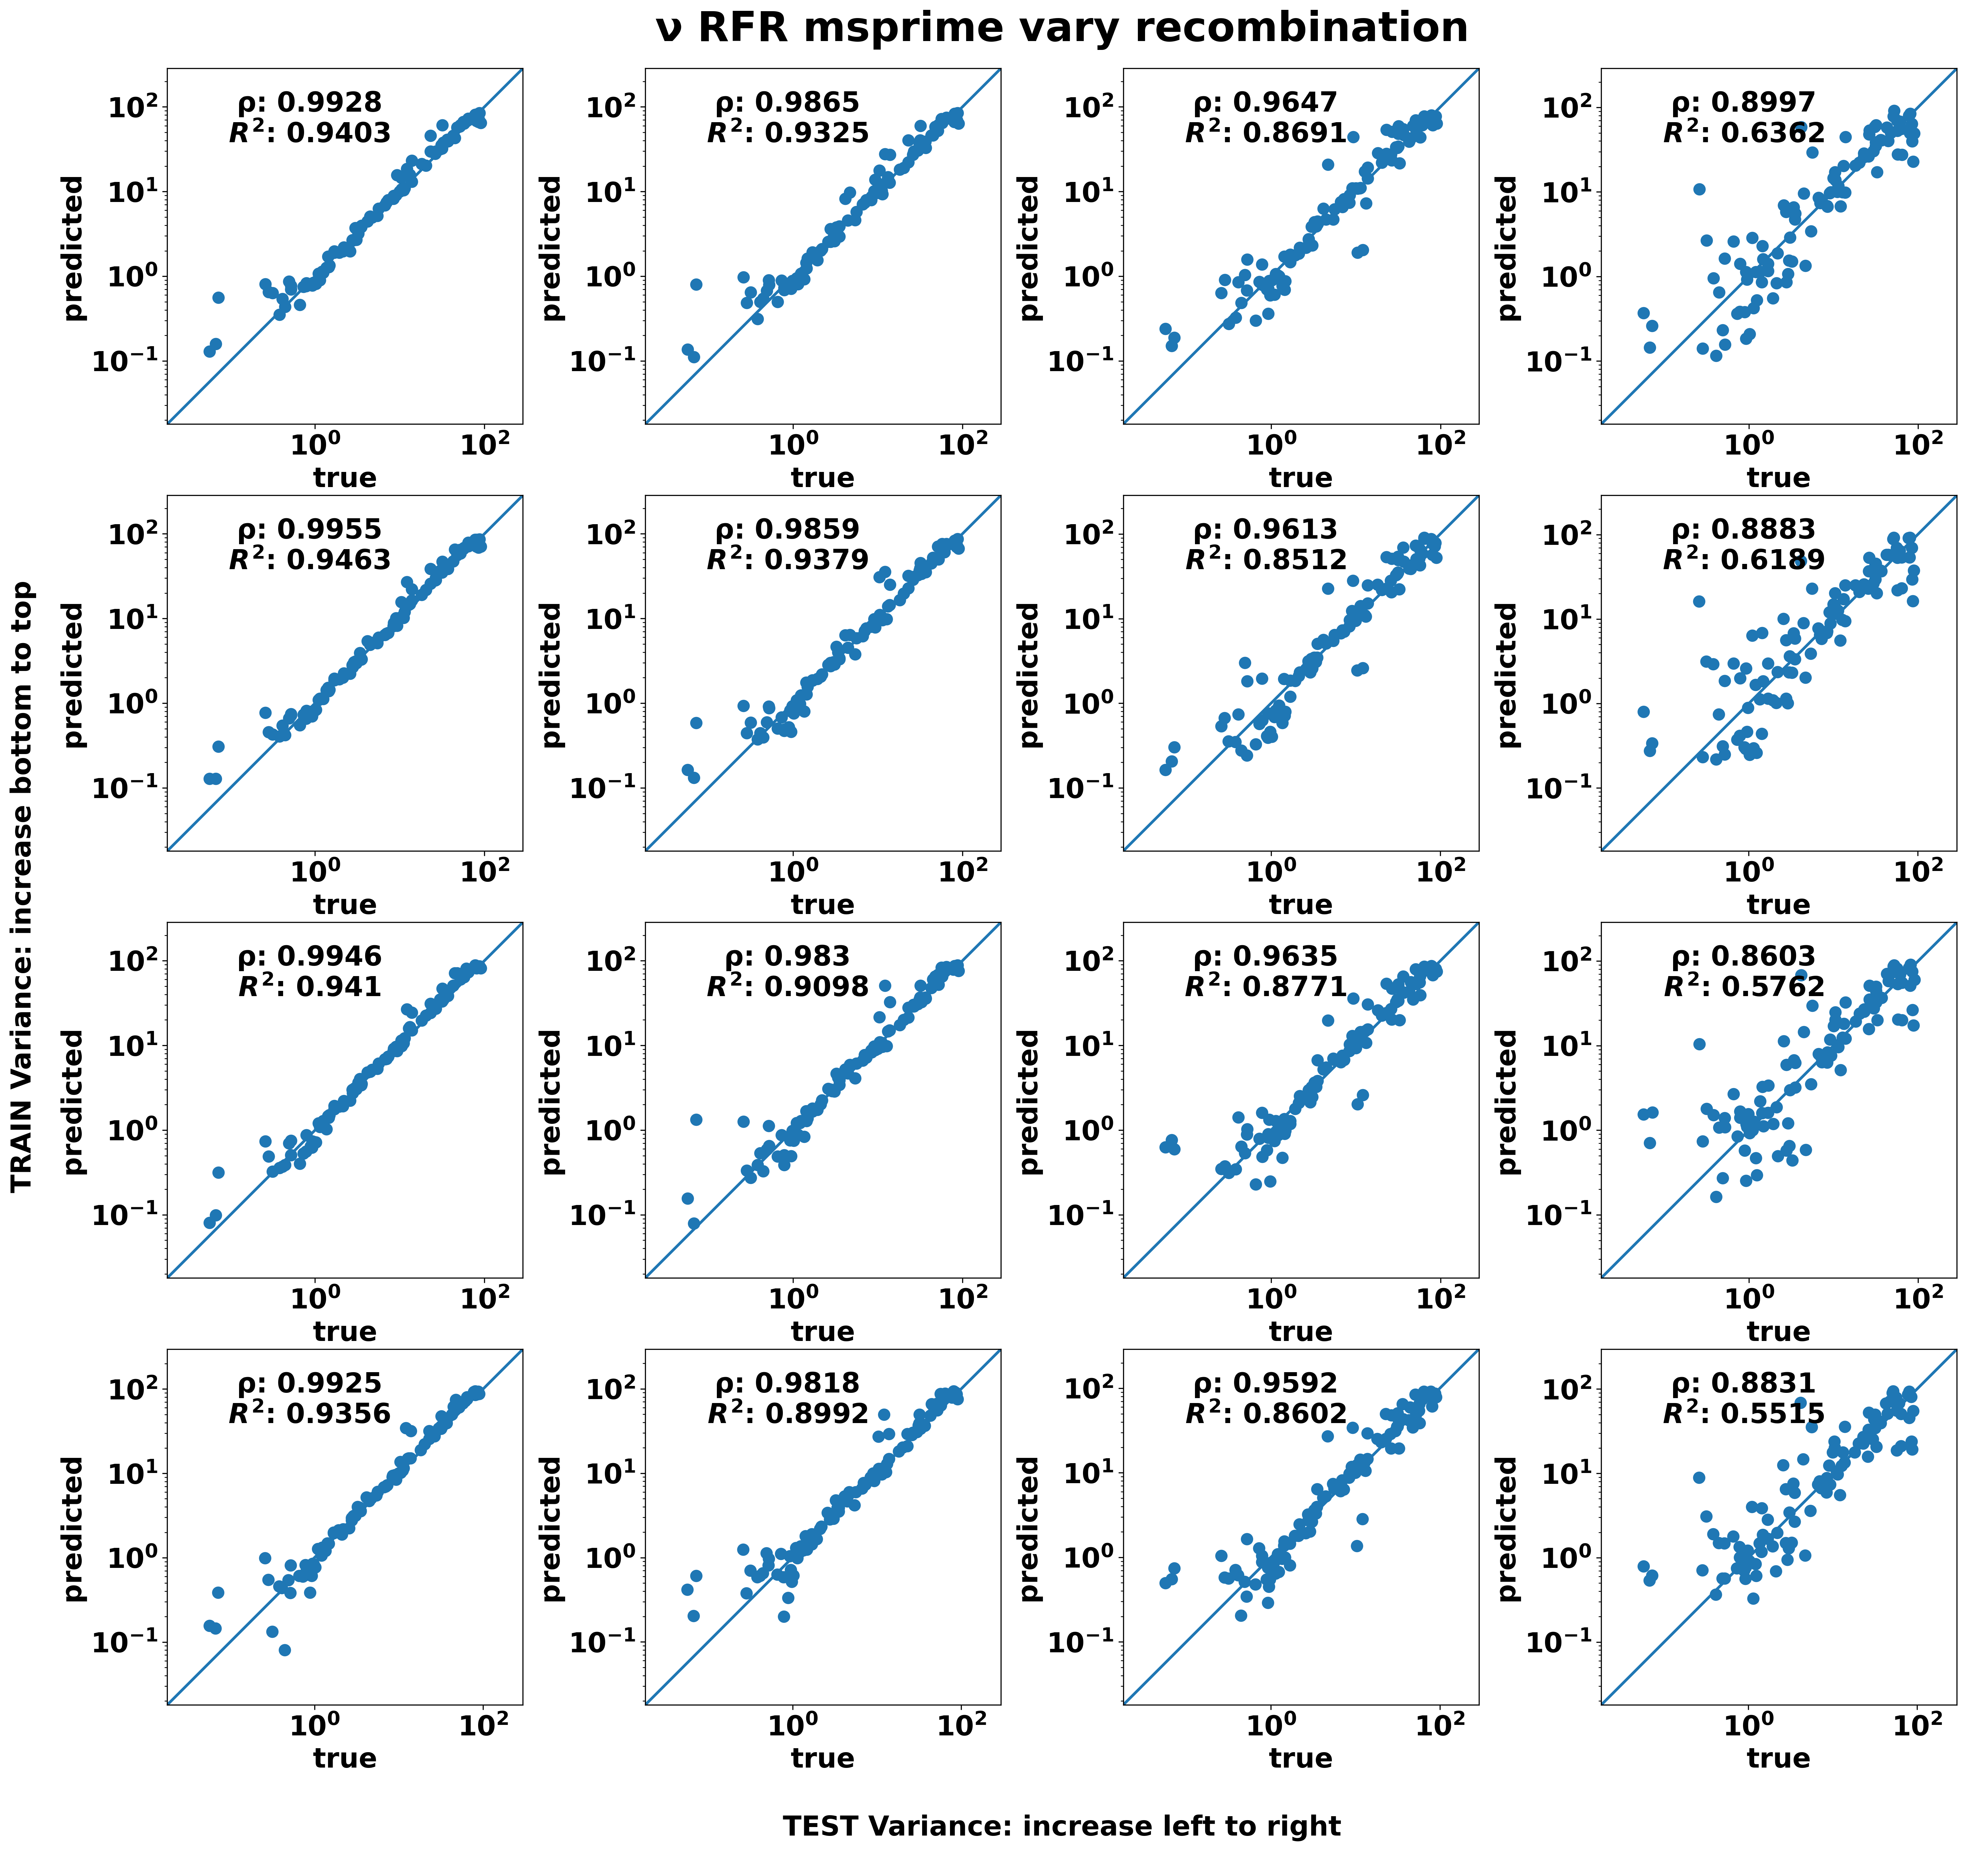

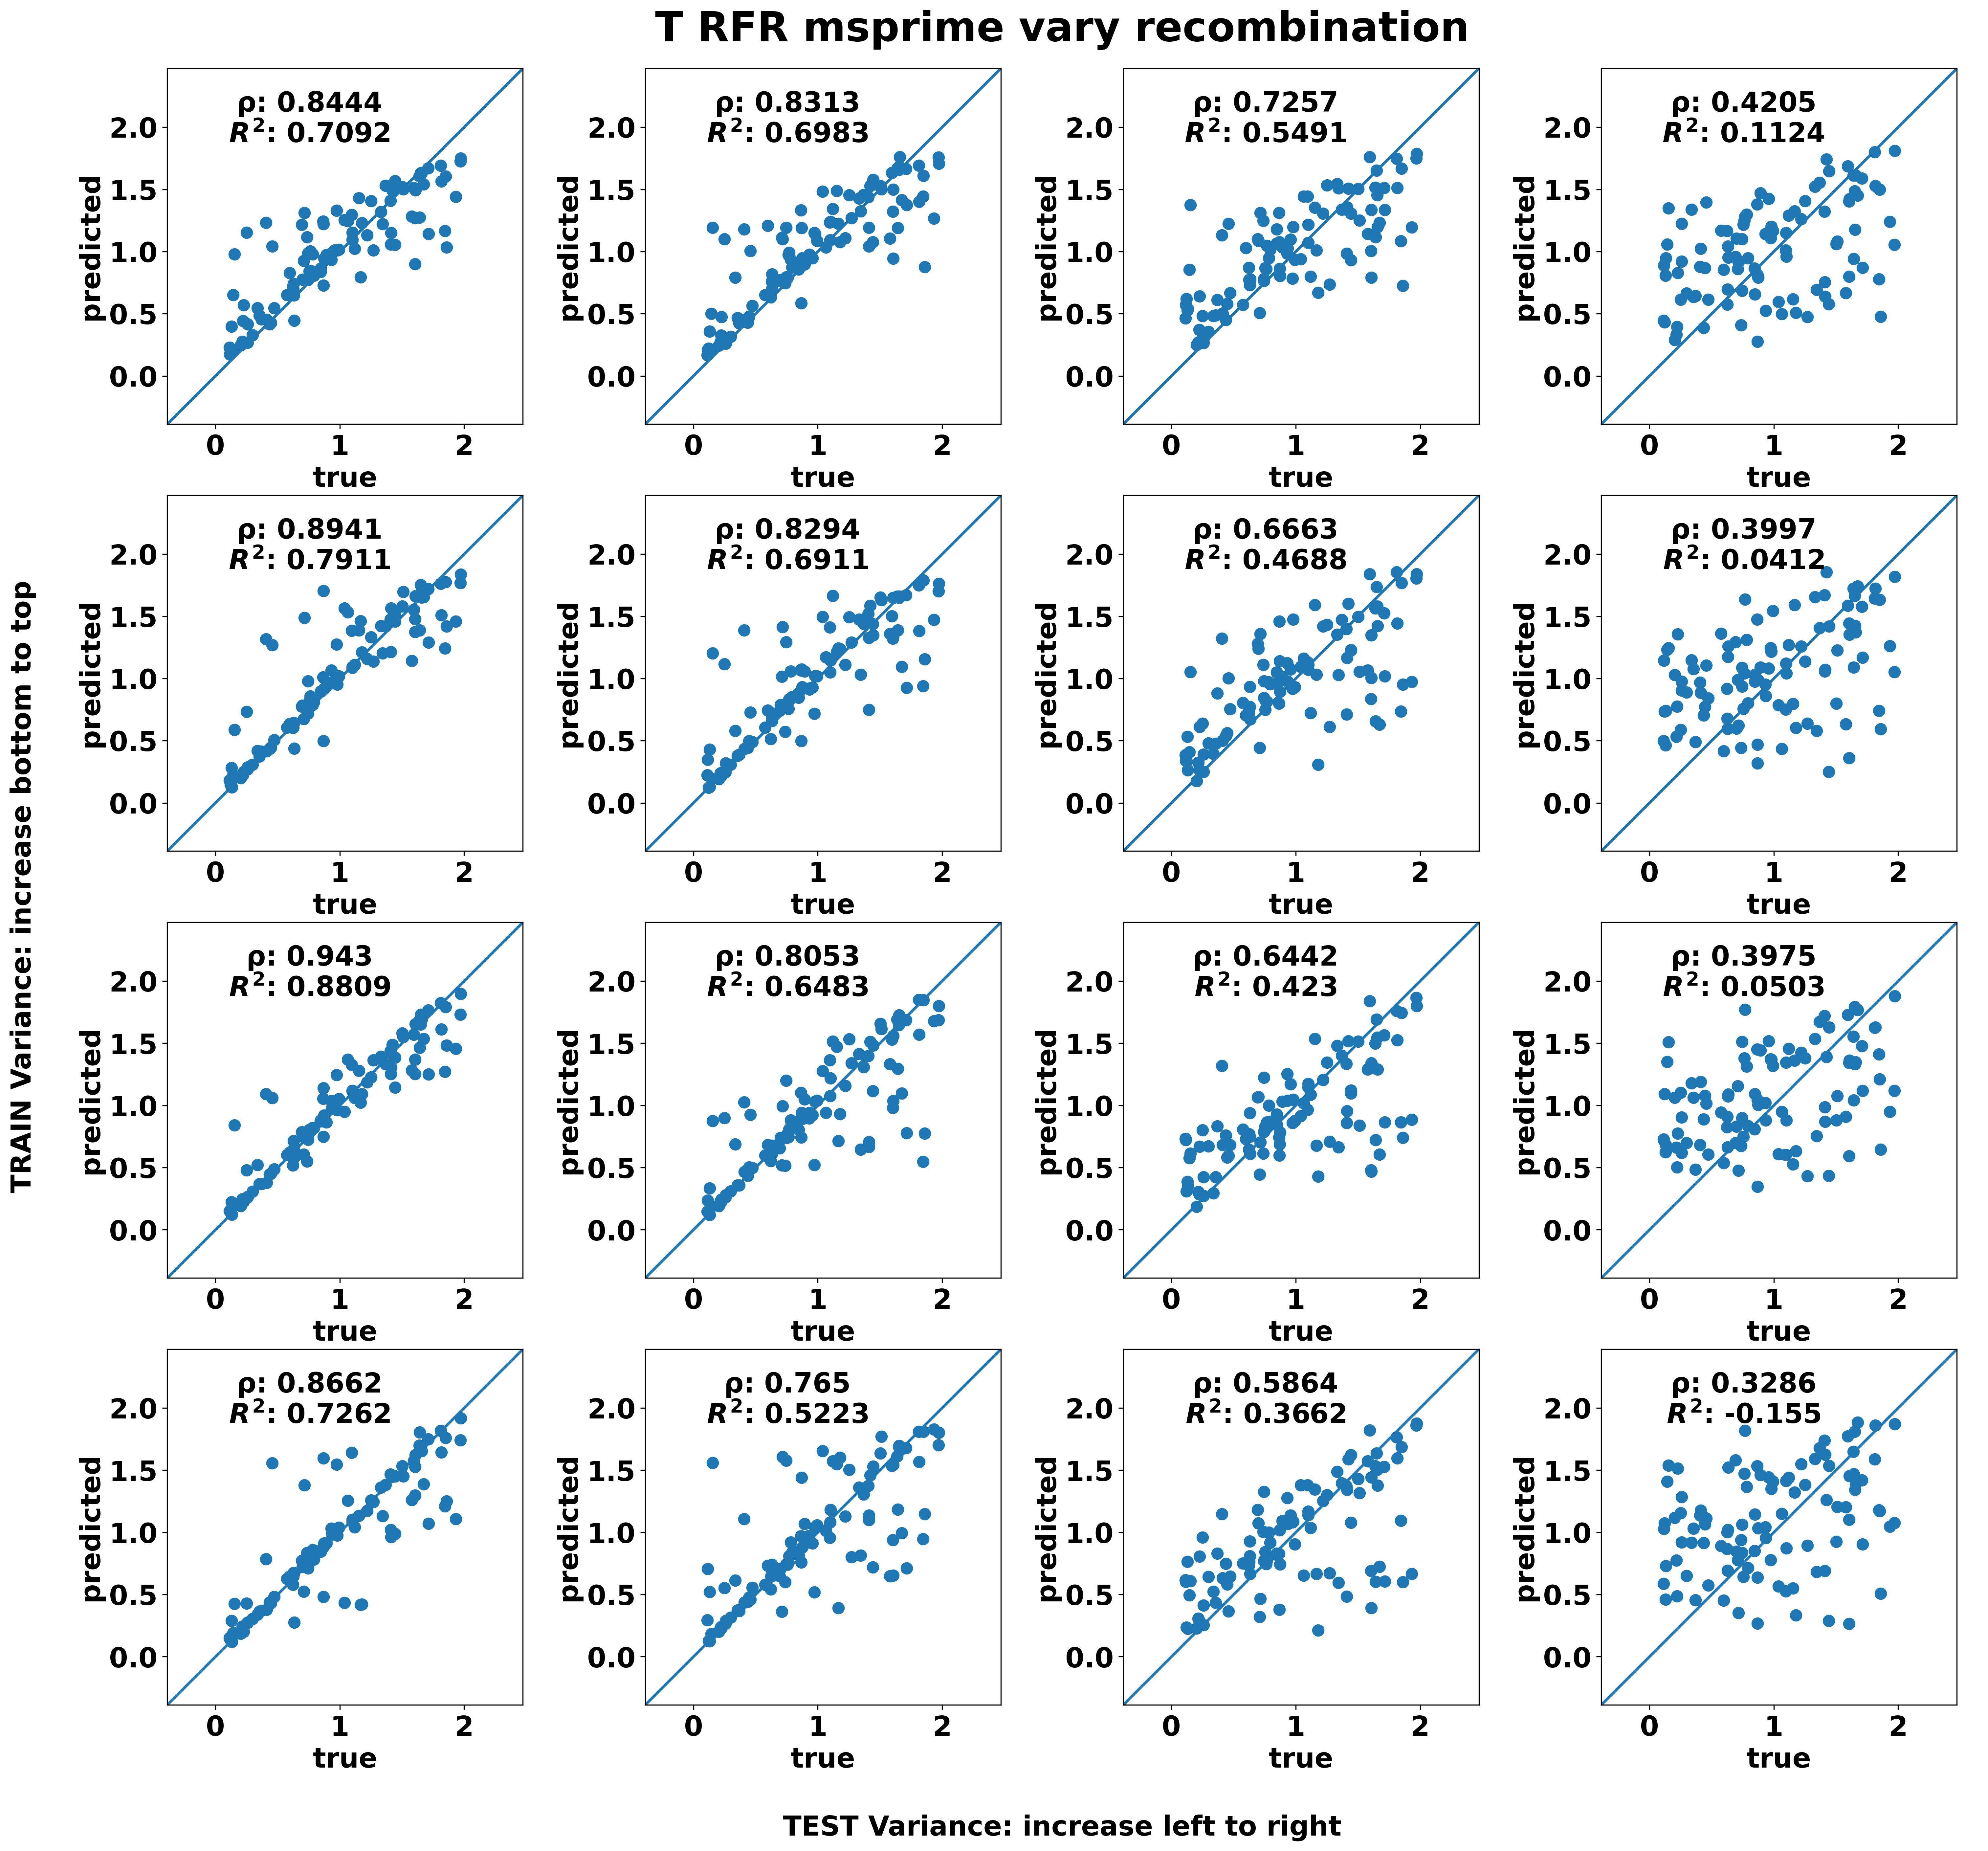

In [12]:
# Plot 4x4 RFR
params = ['ν','T']
model_name = 'RFR msprime vary recombination'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_rfr, list_test_dict, params, model_name, logs, size)
# save fig
for i in range(len(params)):
    plt.figure(i+1).savefig(f'results/msprime/{params[i]}_rfr_rec.png')

In [20]:
# pick out a few example dataset to examine more closely
test_params = pickle.load(open('data/msprime/test_params', 'rb'))
test_params_examp = test_params[::30]
list_test_dict_examp = []
for test_dict in list_test_dict:
    test_dict_examp = {}
    for p in test_params_examp:
        test_dict_examp[p] = test_dict[p]
    list_test_dict_examp.append(test_dict_examp)

(nu, T)=(1.4421279237787266, 1.4432846863769908); seq_l=1.00e+08


(nu, T)=(0.7283859632603703, 1.5790304400106152); seq_l=1.00e+08


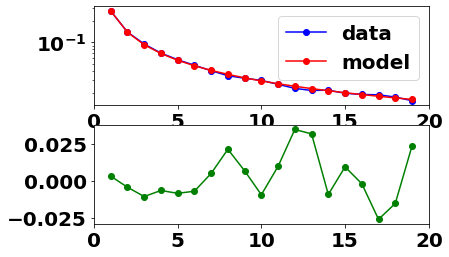

(nu, T)=(26.66878213082862, 0.845981650281977); seq_l=1.00e+08


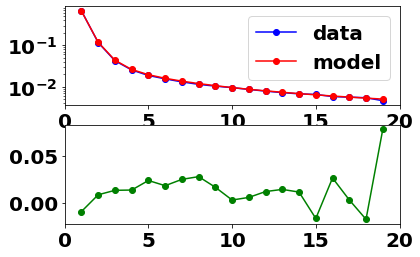

(nu, T)=(1.020350347892736, 1.06404461447637); seq_l=1.00e+08


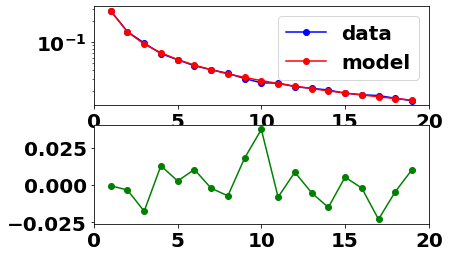

(nu, T)=(1.4421279237787266, 1.4432846863769908); seq_l=5.00e+07


(nu, T)=(0.7283859632603703, 1.5790304400106152); seq_l=5.00e+07


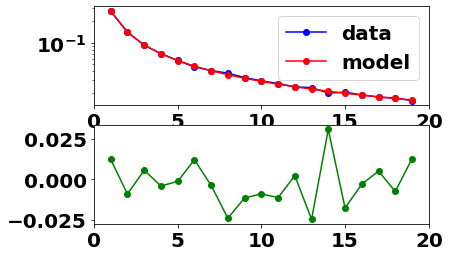

(nu, T)=(26.66878213082862, 0.845981650281977); seq_l=5.00e+07


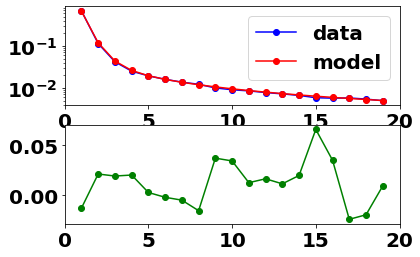

(nu, T)=(1.020350347892736, 1.06404461447637); seq_l=5.00e+07


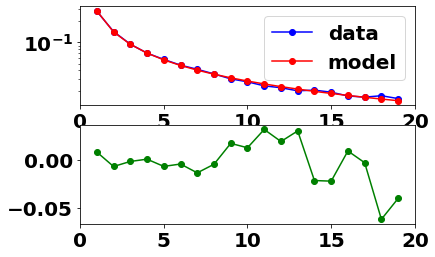

(nu, T)=(1.4421279237787266, 1.4432846863769908); seq_l=1.00e+07


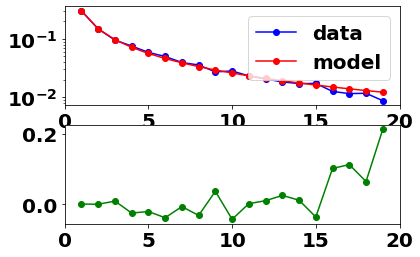

(nu, T)=(0.7283859632603703, 1.5790304400106152); seq_l=1.00e+07


(nu, T)=(26.66878213082862, 0.845981650281977); seq_l=1.00e+07


(nu, T)=(1.020350347892736, 1.06404461447637); seq_l=1.00e+07


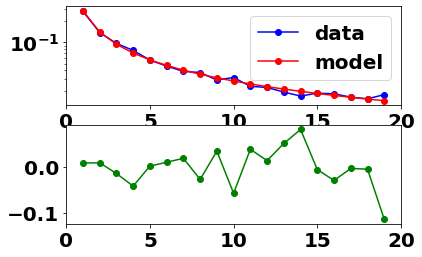

(nu, T)=(1.4421279237787266, 1.4432846863769908); seq_l=5.00e+06


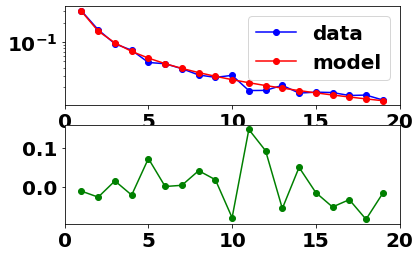

(nu, T)=(0.7283859632603703, 1.5790304400106152); seq_l=5.00e+06


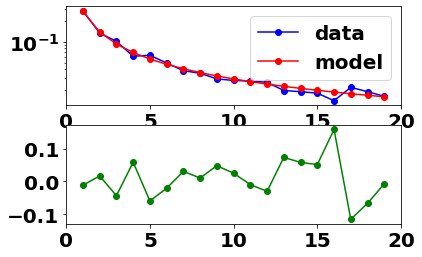

(nu, T)=(26.66878213082862, 0.845981650281977); seq_l=5.00e+06


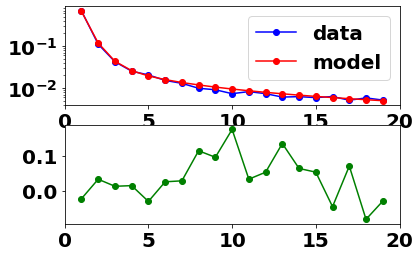

(nu, T)=(1.020350347892736, 1.06404461447637); seq_l=5.00e+06


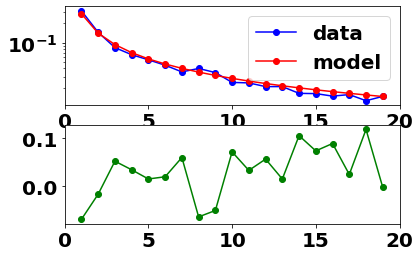

In [21]:
# plot two_epoch model comparison between data (msprime) and model (dadi)
func = dadi.Demographics1D.two_epoch
func_ex = dadi.Numerics.make_extrap_func(func)
ns = [20,]
pts_l = [40, 50, 60]
i=0
for test_dict in list_test_dict_examp:
    for item in test_dict:
        log_p = (10**item[0], item[1])
        model = func_ex(log_p, ns, pts_l)
        data = test_dict[item]
        # print(f'(nu, T)={log_p}; recomb={recomb_list[i]}')
        print(f'(nu, T)={log_p}; seq_l={seq_l_list[i]:.2e}')
        dadi.Plotting.plot_1d_comp_multinom(model, data)
    i+=1